# Pipelines and Text Data 

## Case study : A Prominent  Medical aid scheme in South Africa

We were unable to find a dataset that specifically focuses on reviews about medical aid services. However, considering that medical aid providers work closely with doctors ([momentum]), we decided to focus on patient feedback related to doctors. The case study uses a doctor review dataset as a representative sample to help the medical aid organization identify key areas of concern and analyzing customer sentiments.

[momentum]: https://www.momentum.co.za

<div align="center">
  <img src="image.png" alt="Doctor Review Example" width="500"/>
</div>

# Table of Contents
1. [Justification](#Justification)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Data cleaning & Preprocessing](#Data-cleaning-&-Preprocessing)
4. [Feature selection](#Feature-selection)
4. [Train model:Logistic regression](#Train-model-:-Logistic-regression)
5. [Evaluate model](#Evaluate-model)
6. [References](#References)

# Justification



## Choice of the model

In this case study, the TF-IDF + Logistic Regression model was selected for text analysis, first identifying broad areas of concern and then analyzing customer sentiments.

TF-IDF was selected for its ability to convert textual data into numerical representations. Since machine learning algorithms cannot understand raw text, we needed a method to transform the text data into a numeric format that could be processed effectively. TF-IDF (Term Frequency–Inverse Document Frequency) is a technique used to convert text data into numerical representations (feature vectors). The Term Frequency (TF) reflects how often a term appears in a document, while the Inverse Document Frequency (IDF) indicates how rare the term is across the entire corpus ([Simha, 2021]). By combining the two, TF-IDF calculates the numerical weight of each word based on its frequency in a given document and adjusts for how often it appears in all documents. As a result, it serves as an effective feature extraction method for transforming text data into vectors that can be used as input for machine learning models for classification, such as logistic regression ([CrawlSpider, 2024]).

Unlike Bag of Words, which simply counts the frequency of words in a document without considering inverse document frequency (IDF), or Word2Vec, which uses a shallow two-layer neural network to generate word vectors but often requires additional steps to produce a single vector representation, TF-IDF is simpler , computationally cheap, and more efficient ([CrawlSpider, 2024]). In contrast, advanced models like BERT, which use transformer-based machine learning techniques to capture semantic meaning and context, are much more computationally expensive. This is due to their complex architecture and large number of parameters, making them less suitable for small datasets or resource-constrained environments ([CrawlSpider, 2024]).


Logistic regression was chosen as the classification algorithm due to its proven effectiveness on small labeled datasets and its suitability for binary classification tasks, such as classifying positive, neutral  and negative sentiments ([GeeksforGeeks, 2025]). Its simplicity ensures faster training and evaluation, while reducing the risk of overfitting, which can be problematic with more complex models based on the small dataset we have.  More importantly, logistic regression offers simple interpretation and does not require a lot of data to produce accurate results ([Ashmed, 2024];[Indeed Team , 2025]). 

Naive Bayes is another popular text classification algorithm that performs well in many cases. However, it relies on the strong assumption that all features are independent of each other, which is rarely true in natural language ([Turning , 2022]). This assumption can result in less accurate performance than logistic regression, which does not rely on this assumption ([Kavya, 2023]). SVMs are also strong classifiers and are often used in text classification. However, They require more computational resources and are more difficult to understand and interpret than Logistic Regression, particularly with large feature spaces like those created by TF-IDF ([Bassey, 2019]).

In conclusion, the TF-IDF + Logistic Regression model was the ideal choice for this case study because it is fast, works well with small data, and offers clear and explainable results. While deep learning, Naive Bayes, and SVMs are useful in many NLP tasks, they are less suitable for small datasets.


## Choice of the dataset


The doctor  reviews dataset was chosen because it provides textual feedback from patients regarding their medical consultations and offers rich insight into how patients perceive their care, making this dataset suitable for sentiment analysis.

### Suitability 

The dataset contains the following columns:

* unnamed 0 :This is an integer feature that is unique for  each entry in the dataset. It dost not care any meaning related to the review content or sentiment.

* reviews : This is an unstructured text data feature (object type) that contains written feedback from patients regarding their medical consultations. These text reviews reflect their opinions, feelings, attitude, emotions, and experiences([Parr, 2024]). They play a key role in sentiment analysis, as they help determine whether the overall sentiment expressed by the patient is positive,  negative or neutral ([Gillis, 2024]).

* labels: This is an integer feature that indicates whether a text review is 0 (negative) or 1 (positive). It serves as the target variable when predicting the sentiment of new reviews. labeled data is crucial for supervised machine learning models ([Kanade, 2022]).

* tag : This is a categorical feature that provides a human-readable form of the sentiment in a review, indicating whether it is positive or negative.

Based on the structure of the dataset, it is well-suited for this case study, which requires conducting a text analysis as it contains important features such as reviews and labels.

### Quality 

The dataset contains only 143 entries. It is well-structured, clean, and clearly labeled, which makes it particularly suitable for text analysis. Each entry includes a patient review and a corresponding sentiment label, presented in both binary and human-readable form, allowing for the effective application of supervised machine learning techniques. Although the dataset is relatively small, its quality makes up for the size. They are no major inconsistencies or missing values, which reduces the need for extensive preprocessing. Its organized structure, with almost an equal number of negative and positive reviews, along with its labeled format, makes it ideal for this case study.

link to the dataset : https://www.kaggle.com/datasets/avasaralasaipavan/doctor-review-dataset-has-reviews-on-doctors




[CrawlSpider, 2024]: https://www.crawlspider.com/can-tf-idf-be-used-for-text-classification-how/
[Simha, 2021]: https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
[Indeed Team , 2025]: https://ca.indeed.com/career-advice/career-development/when-to-use-logistic-regression#:~:text=Logistic%20regression%20is%20a%20popular,data%20to%20produce%20accurate%20results.
[Ashmed, 2024]: https://medium.com/@sahin.samia/understanding-logistic-regression-a-practical-guide-7aa94ca62c80
[GeeksforGeeks, 2025]: https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/
[Bassey, 2019]: https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/
[Kavya, 2023]: https://medium.com/@kavyasrirelangi100/naive-bayes-classifier-explained-assumptions-types-and-uses-bef767a758a3
[Turning , 2022]: https://www.turing.com/kb/document-classification-using-naive-bayes
[Gillis, 2024]: https://www.techtarget.com/searchbusinessanalytics/definition/opinion-mining-sentiment-mining
[Parr, 2024]: https://www.repugen.com/blog/sentiment-analysis-in-healthcare
[Kanade, 2022]: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/

###  Analysis plan

| **Step**                      | **Description**                                                                                                                                           |
|------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. Exploratory Data Analysis (EDA)** |- Import libraries <br> - Load and inspect the dataset (dimension, information, datatypes) <br> - Remove unnecessary columns , <br> - Check for missing values, duplicated entries  <br> - View class distribution (Bar plot, Pie chart, Histogram, Boxplot)|
| **2. Data Cleaning & Preprocessing**  | - Convert text to lowercase  <br> - Remove special characters  <br> - Tokenize the text <br> - Remove stopwords <br> - Remove short words  <br> - Remove long words <br> - Perform lemmatization |
| **3. Feature Selection**              | -  Convert the list of tokens back into a single string  <br> - Create a pipeline <br> - Converts the review column into TF-IDF vectors <br> - Applies chi-squares test to each feature <br> - Select the top K feature <br> - Display them with their scores |
| **4. Train the model**                | - Find best hyperparameters <br> - Split the data into training and testing <br> - Train the model with the best hyperparameters|
| **5. Interpret & Evaluate the model**| - Evaluate with: <br>   • Accuracy <br>  • Confusion matrix <br>  • Precision <br>   • Recall <br>   • F1-score <br>   • ROC (curve)  <br>   • AUC <br> • Predict sentiment |
| **6. Report Writing**                | - Summarize: <br>   • Justification for TF-IDF + Logistic Regression <br>   • Dataset structure and source <br>  • EDA results (visuals, distribution) <br> • Data cleaning and preprocessing steps <br>   • Feature Selection  <br>   • Train the model  <br>   • Model performance metrics <br> |

In [20]:
# Please install squarify package for visualizing text data
#!pip install squarify

# Exploratory Data Analysis



In this section, we go through the following steps:
- Import libraries
- Load and inspect the dataset (dimension, information, datatypes)
- Remove unnecessary columns , 
- Check for missing values, duplicated entries 
- View class distribution (Bar plot, Pie chart, Histogram, Boxplot)


###  Import libraries 
We begin this analysis by importing the relevant libraries that will be useful for EDA, feature selection, train the model , and  evaluate the model.

In [21]:
import numpy as np # Numerical operations 
import pandas as pd # Data manpulatioin
import matplotlib.pyplot as plt # Data visualisaion 
import seaborn as sns # Advanced visualisations
import plotly.express as px # High-level API for creating figures
%matplotlib inline 
import warnings # Set plots to appear under the code cell 
warnings.filterwarnings('ignore') # Ignore warnings messages for cleaning output 
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.pipeline import Pipeline                 # Create a machine learning pipeline
#from sklearn.decomposition import PCA                   # Reduce dimensionality of data using Principal Component Analysis
from sklearn.linear_model import LogisticRegression     # Perform classification using logistic regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrics to evaluate model performance
import re # Regular expressions for text processing
import nltk # Natural Language Toolkit for text processing
from nltk.corpus import stopwords # Stopwords for removing common words
from nltk.stem import WordNetLemmatizer # Lemmatizer for reducing words to their base form
from collections import Counter  # Import Counter from collections module to count occurrences of words
nltk.download('stopwords') # Download stopwords from NLTK
nltk.download('wordnet') # Download WordNet for lemmatization
nltk.download('punkt') # Download Punkt tokenizer for sentence splitting
nltk.download('punkt_tab') # Download Punkt tokenizer for sentence splitting (tab version)
from wordcloud import WordCloud  # Import WordCloud for generating word clouds
import squarify  # Import squarify for creating treemaps
from sklearn.feature_extraction.text import TfidfVectorizer # Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_selection import SelectKBest, chi2 # Feature selection using chi-squared test
from sklearn.model_selection import GridSearchCV # Grid search for hyperparameter tuning
from sklearn.metrics import roc_curve, auc  # Import roc_curve and auc for ROC curve and AUC calculation

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eliezer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/eliezer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/eliezer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/eliezer/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



###  load the dataset 
Here we load the dataset and display the first five rows.

In [22]:
# Load data and display the first 5 rows.
# Encoding used to read the CSV file, which is necessary for handling special characters.
df = pd.read_csv('doctorReviews.csv',encoding='ISO-8859-1')  # Read the CSV file into a DataFrame 
pd.set_option('display.max_colwidth', 200)  # Set maximum column width for display
df.head(5)  # Display the first 5 rows of the DataFrame

,Unnamed: 0,reviews,labels,tag
0,93,he explained initially that it takes 4-5 sitings and its total treatment cost is is about 10000 rupees but the total treatment he charged 22250 rupees including medicinesthe estimation of treatmen...,0,negative
1,33,great dr definitely recommend he recommends less medicine and explain everything and provide solutions,1,positive
2,129,doctor came and spent 9 seconds and recommended for nose throat endoscopy & some hearing test it was night 10 and hearing test doctor is not avilable does it make sense? charges for endoscopy is 2...,0,negative
3,7,i am completely satisfied with the consultation i have been having acute severe bronchitis and acute laringitis for the last 20 days which i was not aware of i have consulted a doctor from differe...,1,positive
4,38,my experience was nice dr dyed was cool and compose patiently listened to my medication history and gave simple treatment hopefully i should be ok post 3 course of days i will recommend people for...,1,positive


###  Dimension

Here we display the number of rows and columns in the dataset.

In [23]:
# Display the shape of the DataFrame, which gives the number of rows and columns.
df.shape # Output the shape of the DataFrame

(143, 4)

### Information 

Here we get a summary of the dataset, including the number of rows, columns, the name of columns , the number of non null values , the types of columns and the memory usage.

In [24]:
# Display information about the DataFrame, including data types and non-null counts.
df.info() # Output the information of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  143 non-null    int64 
 1   reviews     143 non-null    object
 2   labels      143 non-null    int64 
 3   tag         143 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.6+ KB


###  Remove unnecessary Column 


Let's remove unnecessary column.

In [25]:
df_cleaned = df.drop(['Unnamed: 0','tag'], axis=1) # Drop unnecessary columns from the DataFrame

### Checking for missing values

Let's check if the dataset contains missing values

In [26]:
# Count the missing values in the dataset
df_cleaned.isnull().sum() # Output the count of missing values in each column

reviews    0
labels     0
dtype: int64

###  Checking for duplicates entries 

Let's check if the dataset contains duplicate values

In [27]:
# Count the duplicated row
df_cleaned.duplicated().sum()

1

One duplicated value was found. Let’s remove that row

In [28]:
df_cleaned = df_cleaned.drop_duplicates() # Remove duplicate rows from the DataFrame

## Visualization

### Bar plot distribution (positive/negative) 

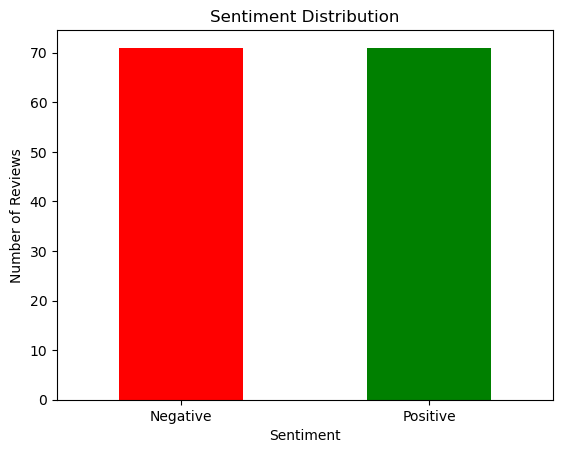

In [29]:
# Visualize the distribution of sentiment labels in the dataset using a bar plot
df_cleaned['labels'].value_counts().plot(kind='bar', color=['red', 'green']) # Plot a bar plot showing the distribution of sentiment labels
plt.xticks([0,1], ['Negative', 'Positive'], rotation=0) # Set x-ticks to show 'Negative' and 'Positive' labels
plt.title('Sentiment Distribution') # Set the title of the plot
plt.xlabel('Sentiment') # Set the x-axis label  
plt.ylabel('Number of Reviews') # Set the y-axis label
plt.show() # Display the plot

### Pie chart distribution (positive/negative) 

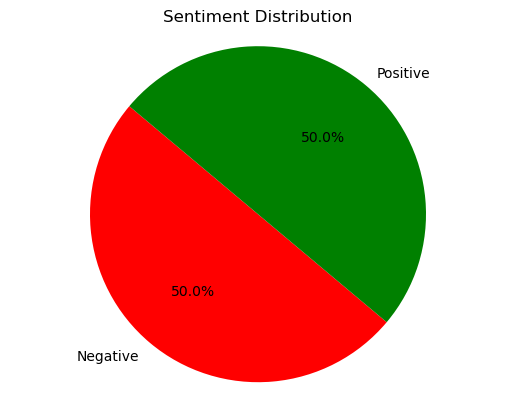

In [30]:
# visualize the distribution of sentiment labels using a pie chart
plt.pie(df_cleaned['labels'].value_counts(), labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=140, colors=['red', 'green']) # Create a pie chart showing the distribution of sentiment labels
plt.title('Sentiment Distribution') # Set the title of the pie chart
plt.axis('equal') # Ensure the pie chart is a circle
plt.show() # Display the pie chart  

We see that the number of negative and positive reviews is almost identical, each representing approximately 50% of the dataset. This balanced distribution is ideal for sentiment analysis, as it prevents the model from being biased toward one class or the other.

### Histogram distribution (Length of each review) 

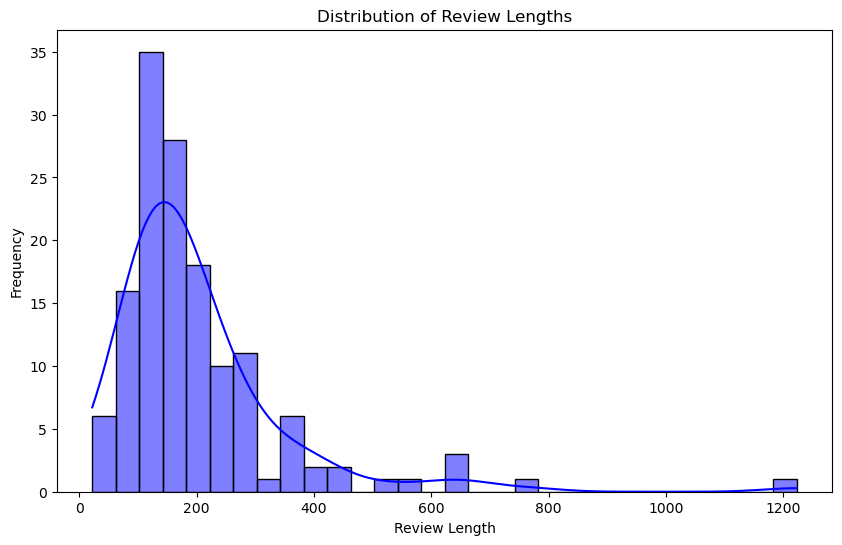

In [31]:
# Calculate and visualize the length of each review and plot the distribution
df_cleaned['review_length'] = df_cleaned['reviews'].apply(len) # Create a new column 'review_length' that contains the length of each review
plt.figure(figsize=(10, 6)) # Set the figure size for the plot
sns.histplot(df_cleaned['review_length'], bins=30, kde=True, color='blue') # Plot a histogram with a kernel density estimate (KDE) overlay
plt.title('Distribution of Review Lengths') # Set the title of the plot
plt.xlabel('Review Length') # Set the x-axis label
plt.ylabel('Frequency') # Set the y-axis label
plt.show() # Display the plot

The distribution of review lengths is right-skewed, indicating that most reviews are relatively short, with a few significantly longer ones. For now, we will not attempt to normalize the distribution.

### Boxplot distribution (Review length by sentiment) 

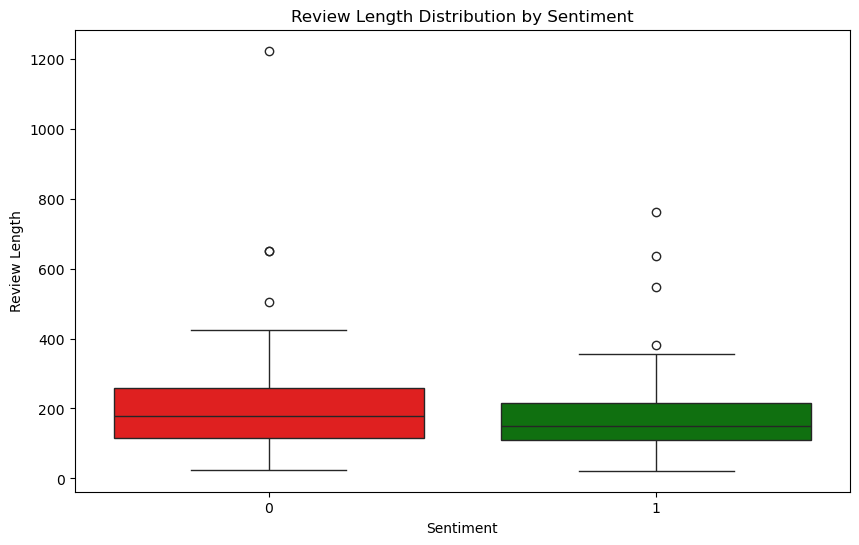

In [32]:
# The distribution of review lengths for positive and negative sentiments 
plt.figure(figsize=(10, 6)) # Set the figure size for the plot  
sns.boxplot(x='labels', y='review_length', data=df_cleaned, palette=['red', 'green']) # Create a box plot showing the distribution of review lengths for each sentiment label
plt.title('Review Length Distribution by Sentiment') # Set the title of the plot
plt.xlabel('Sentiment') # Set the x-axis label
plt.ylabel('Review Length') # Set the y-axis label
plt.show() # Display the plot   

Both negative and positive reviews length contain outliers, which can be addressed during data preprocessing. We can also observe that negative sentiment reviews tend to have greater length than positive sentiment reviews.

# Data cleaning & Preprocessing 

Let's look at the reviews column.

In [33]:
# Display the first 5 rows of the 'reviews' column 
df_text_reviews = df_cleaned[['reviews']]  # Create a new DataFrame with 'reviews' and 'labels' columns
df_text_reviews.head(5)  # Output the first 5 rows of the DataFrame

,reviews
0,he explained initially that it takes 4-5 sitings and its total treatment cost is is about 10000 rupees but the total treatment he charged 22250 rupees including medicinesthe estimation of treatmen...
1,great dr definitely recommend he recommends less medicine and explain everything and provide solutions
2,doctor came and spent 9 seconds and recommended for nose throat endoscopy & some hearing test it was night 10 and hearing test doctor is not avilable does it make sense? charges for endoscopy is 2...
3,i am completely satisfied with the consultation i have been having acute severe bronchitis and acute laringitis for the last 20 days which i was not aware of i have consulted a doctor from differe...
4,my experience was nice dr dyed was cool and compose patiently listened to my medication history and gave simple treatment hopefully i should be ok post 3 course of days i will recommend people for...


Now we proceed with text preprocessing (NLP). 

We create functions to:
* Convert text to lowercase
* Remove special characters
* Tokenize the text
* Remove stopwords
* Remove short words
* Remove long words
* Perform lemmatization

In [34]:
#  create function to convert reviews column  to lowercase  
def to_lowercase(text):
    text = text.lower() # Convert the text to lowercase
    return text # Return the cleaned text

# Function to remove special characters and numbers from the reviews column
def remove_special_characters(text):
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    return text  # Return the cleaned text

# Function to  tokenize the reviews column into words
def tokenize_text(text):
    words = nltk.word_tokenize(text)  # Tokenize the text into words
    return words  # Return the list of words

# Function to remove stopwords from the reviews column
def remove_stopwords(words):
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return words  # Return the list of words without stopwords 

# Function to remove short words (length <= 2) from the reviews column
def remove_short_words(words):
    words = [word for word in words if len(word) > 2]  # Remove words with length less than or equal to 2
    return words  # Return the list of words without short words

# Function to remove long words (length >= 20) from the reviews column
def remove_long_words(words):
    words = [word for word in words if len(word) < 20]  # Remove words with length greater than or equal to 20
    return words  # Return the list of words without long words

# Function to lemmatize the words in the reviews column
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()  # Create a lemmatizer object
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize the words
    return words  # Return the list of lemmatized words

Here, we create a function to preprocess the review column.

In [35]:
# Function to preprocess the reviews column
def preprocess_reviews(text):
    text = to_lowercase(text)  # Convert reviews to lowercase
    text = remove_special_characters(text)  # Remove special characters and numbers
    text = tokenize_text(text)  # Tokenize the reviews into words
    text = remove_stopwords(text)  # Remove stopwords
    text = remove_short_words(text)  # Remove short words
    text = remove_long_words(text)  # Remove long words
    text = lemmatize_words(text)  # Lemmatize the words
    return text  # Return the preprocessed text

# Preprocess the text reviews in the DataFrame
df_cleaned['reviews'] = df_cleaned['reviews'].apply(preprocess_reviews)

Let's look at the reviews column after preprocessing.

In [36]:
df_cleaned.head(5)  # Output the first 5 rows of the preprocessed DataFrame

,reviews,labels,review_length
0,"[explained, initially, take, sitings, total, treatment, cost, rupee, total, treatment, charged, rupee, including, medicinesthe, estimation, treatment, false]",0,206
1,"[great, definitely, recommend, recommends, less, medicine, explain, everything, provide, solution]",1,102
2,"[doctor, came, spent, second, recommended, nose, throat, endoscopy, hearing, test, night, hearing, test, doctor, avilable, make, sense, charge, endoscopy, doctor, going, perform, request, hospital...",0,651
3,"[completely, satisfied, consultation, acute, severe, bronchitis, acute, laringitis, last, day, aware, consulted, doctor, different, hospital, earlier, wasnt, advised, test, xray, doctor, didnt, ga...",1,637
4,"[experience, nice, dyed, cool, compose, patiently, listened, medication, history, gave, simple, treatment, hopefully, post, course, day, recommend, people, medication]",1,211


We would now like to find out what the main areas of concern are by following these steps: 
* Create the function to count the 15 most common words
* Call the function with negative or positive sentiment 

In [37]:

# Function to count  the most common words in the reviews for a given sentiment
def find_15_most_common_words(df, sentiment):
    words = []  # Initialize an empty list to store words
    for review in df[df['labels'] == sentiment]['reviews']:
        words.extend(review)  # Extend the list with words from each review
    return Counter(words).most_common(15)  # Return the most common words


In [38]:
# Call the function to find the 15 most common words in positive reviews
most_positive_words = find_15_most_common_words(df_cleaned, 1)
print("\n15 Most Common Words in Positive Reviews:")
for word, count in most_positive_words:
    print(f"{word}: {count}")  # Print each word and its count


# Find the 15 most common words in negative reviews
most_negative_words = find_15_most_common_words(df_cleaned, 0)
print("\n15 Most Common Words in Negative Reviews:")
for word, count in most_negative_words:
    print(f"{word}: {count}")  # Print each word and its count


15 Most Common Words in Positive Reviews:
doctor: 49
treatment: 23
patient: 23
good: 20
problem: 19
friendly: 18
time: 17
medicine: 16
recommend: 14
happy: 13
issue: 11
health: 11
satisfied: 10
explained: 10
experience: 10

15 Most Common Words in Negative Reviews:
doctor: 68
test: 26
time: 23
patient: 21
medicine: 17
appointment: 16
treatment: 15
hospital: 15
said: 15
even: 12
experience: 12
good: 11
day: 11
went: 10
dont: 10


Visualization :
* Word Cloud
* Treemap
* Pie chart

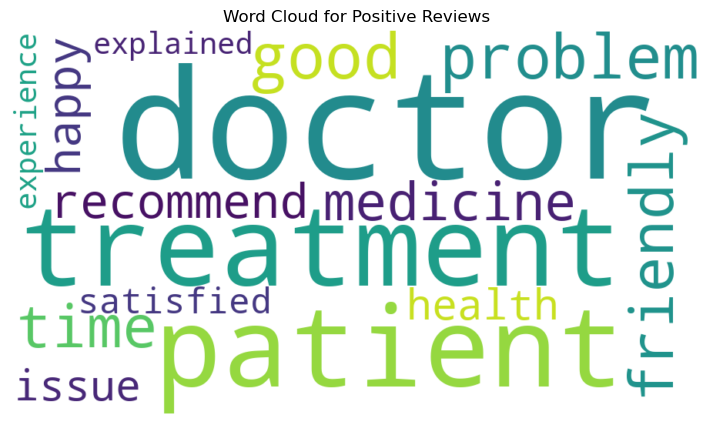

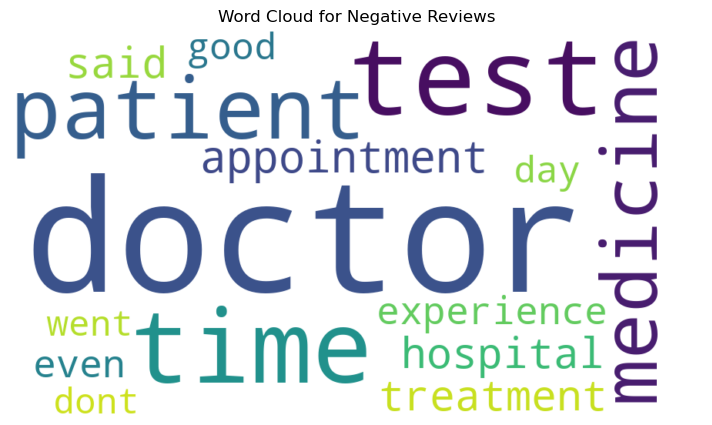

In [39]:
# Visualize 10 most common words with Word Cloud and save the word cloud image
def plot_word_cloud(words, title):
    wordcloud = WordCloud(width=900, height=500, background_color='white').generate_from_frequencies(dict(words)).to_file(f"{title}.png")  # Generate and save a word cloud from the word frequencies
    plt.figure(figsize=(10, 5))  # Set the figure size for the plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
    plt.axis('off')  # Turn off the axis
    plt.title(title)  # Set the title of the plot
    plt.show()  # Display the plot
# Plot word cloud for positive reviews
plot_word_cloud(most_positive_words, 'Word Cloud for Positive Reviews')  # Plot the word cloud for positive reviews
# Plot word cloud for negative reviews
plot_word_cloud(most_negative_words, 'Word Cloud for Negative Reviews')  # Plot the word cloud for negative reviews


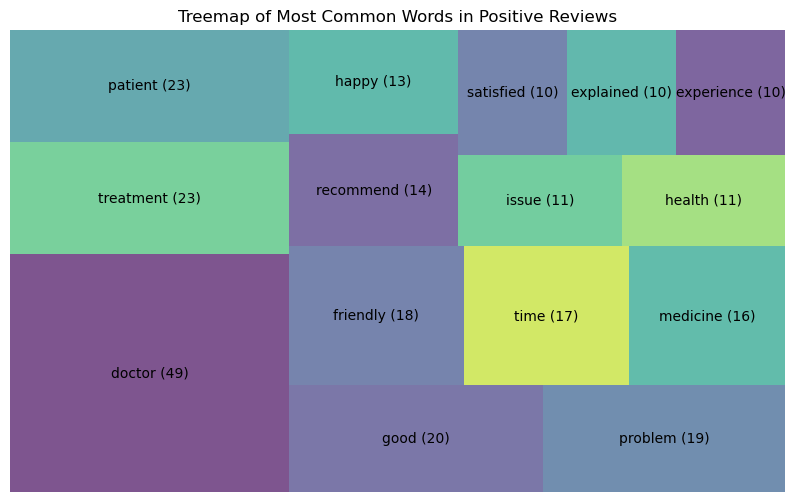

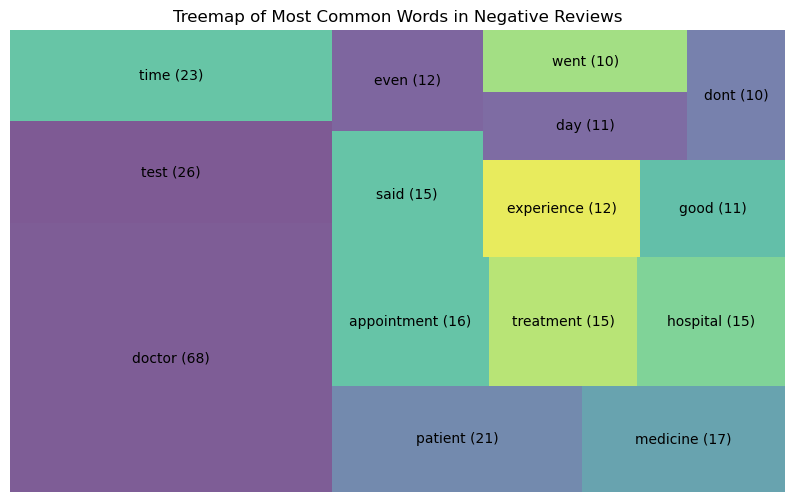

In [40]:
# Tree of most common words in negative and positive reviews with treemap

def plot_treemap(words, title):
    labels = [f"{word} ({count})" for word, count in words]  # Create labels for the treemap
    sizes = [count for _, count in words]  # Extract sizes from the word counts
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    squarify.plot(sizes=sizes, label=labels, alpha=0.7)  # Create a treemap with the sizes and labels
    plt.title(title)  # Set the title of the plot
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the plot

# Plot treemap for positive reviews
plot_treemap(most_positive_words, 'Treemap of Most Common Words in Positive Reviews')  # Plot the treemap for positive reviews
# Plot treemap for negative reviews
plot_treemap(most_negative_words, 'Treemap of Most Common Words in Negative Reviews')  # Plot the treemap for negative reviews


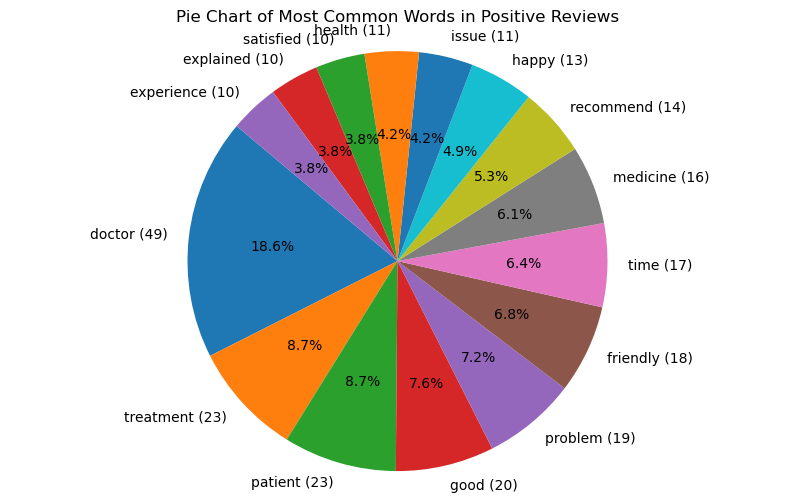

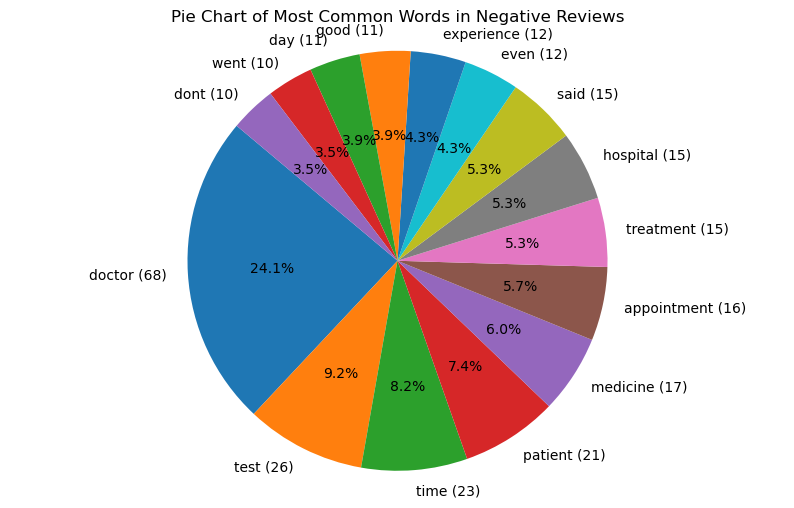

In [41]:
# Pie chart of most common words in negative and positive reviews
def plot_pie_chart(words, title):
    labels = [f"{word} ({count})" for word, count in words]  # Create labels for the pie chart
    sizes = [count for _, count in words]  # Extract sizes from the word counts
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)  # Create a pie chart with the sizes and labels
    plt.title(title)  # Set the title of the plot
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.show()  # Display the plot

# Plot pie chart for positive reviews
plot_pie_chart(most_positive_words, 'Pie Chart of Most Common Words in Positive Reviews') 
# Plot pie chart for negative reviews
plot_pie_chart(most_negative_words, 'Pie Chart of Most Common Words in Negative Reviews')  

To identify the main areas of concern in negative reviews, we analyze the 15 most common words. We can then group them into key categories to better understand the underlying issues.


| Main Area                     | Common Words                         | Interpretation                                      |
|------------------------------|------------------------------------|----------------------------------------------------|
| Interaction Between Doctor and Patient    | doctor (68), patient (21), said (15), experience (12), dont (10) | Indicates issues with communication, negative experiences, or poor interactions |
| Medical Tests and Treatment    | test (26), treatment (15), medicine (17)                      | Shows dissatisfaction with tests, medication, or treatment procedures |
| Time and Appointment Management | time (23), appointment (16), day (11), went (10)              | Highlights complaints about long waits, delays, or scheduling problems |
| Healthcare | hospital (15)                                                  | Points to concerns related to hospital issues |

# Feature selection

Chi-square feature selection method consists of evaluating the relationship between each feature and the target variable, and selecting the features that are most relevant for predicting the target ([SAMI’UN,2024],2024).
* Convert the list of tokens back into a single string
* Create a pipeline
* Converts the review column into TF-IDF vectors
* Applies chi-squares test to each feature 
* Select the top K feature most correlated with the sentiment label 
* Display them with their scores

[SAMI’UN,2024]: https://www.jatit.org/volumes/Vol102No18/3Vol102No18.pdf


In [42]:
# Convert the list of tokens back into a single string for each review
def join_words(words):
    return ' '.join(words)  # Join the list of words into a single string
# Apply the join_words function to the 'reviews' column
df_cleaned['reviews'] = df_cleaned['reviews'].apply(join_words)  # Convert the list of words back into a single string for each review
df_cleaned.head(5)  # Output the first 5 rows of the DataFrame after joining words

,reviews,labels,review_length
0,explained initially take sitings total treatment cost rupee total treatment charged rupee including medicinesthe estimation treatment false,0,206
1,great definitely recommend recommends less medicine explain everything provide solution,1,102
2,doctor came spent second recommended nose throat endoscopy hearing test night hearing test doctor avilable make sense charge endoscopy doctor going perform request hospital humanity ground spend t...,0,651
3,completely satisfied consultation acute severe bronchitis acute laringitis last day aware consulted doctor different hospital earlier wasnt advised test xray doctor didnt gave proper treatment con...,1,637
4,experience nice dyed cool compose patiently listened medication history gave simple treatment hopefully post course day recommend people medication,1,211


- Print best K found 

In [43]:
# Create pipeline with TF-IDF vectorization, feature selection, and logistic regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # Convert text data to TF-IDF features
    ('select', SelectKBest(chi2)), # Select the best features using chi-squared test
    ('classifier', LogisticRegression(max_iter=1000)) # Classifier using logistic regression
])

param_grid_search = {
    'select__k': [10, 20, 30, 40, 50] # Hyperparameter grid for the number of features to select
}
grid_search_value = GridSearchCV(pipeline, param_grid_search, cv=5, scoring='accuracy') # Perform grid search with cross-validation to find the best number of features
grid_search_value.fit(df['reviews'], df['labels']) # Fit the grid search model to the data
best_k = grid_search_value.best_params_['select__k'] # Get the best number of features found by grid search
print("Best k value found:", grid_search_value.best_params_['select__k']) # Output the best number of features found by grid search




Best k value found: 30


- Display the selected features and their scores

In [44]:
# TF-IDF vectorization of the reviews
create_vectorizer = TfidfVectorizer()  # Create a TF-IDF vectorizer that treats each review as a list of words
X = create_vectorizer.fit_transform(df_cleaned['reviews'])  # Fit and transform the reviews to create a TF-IDF matrix
y = df_cleaned['labels']  # Extract the labels (sentiment) from the DataFrame     
select_k_best = SelectKBest(chi2, k=best_k)  # Create a SelectKBest object to select the top features based on chi-squared test
X_new = select_k_best.fit_transform(X, y)  # Fit and transform the TF-IDF matrix to select the top features
selected_features = select_k_best.get_support(indices=True)  # Get the indices of the selected features
# Show selected feature names and scores
feature_names = np.array(create_vectorizer.get_feature_names_out())  # Get the feature names from the vectorizer
selected_feature_names = feature_names[selected_features]  # Get the names of the selected features
selected_feature_scores = select_k_best.scores_[selected_features]  # Get the scores of the selected features
# Create a DataFrame to display the selected features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': selected_feature_scores})  # Create a DataFrame with selected features and their scores
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)  # Sort the DataFrame by scores in descending order
print(selected_features_df.head(best_k))  # Output the top 40 selected features



           Feature     Score
10        friendly  3.521928
19            nice  2.410642
7             even  1.911773
2        available  1.905569
29            well  1.673217
0      appointment  1.635385
5             dont  1.627607
8      experienced  1.601882
12           happy  1.521790
17      medication  1.471620
4           doesnt  1.468286
14            hour  1.417560
9         explains  1.381970
16         listens  1.359121
1         approach  1.344979
27            test  1.289179
6        emergency  1.270139
3             come  1.225783
13           hoped  1.213902
11           great  1.183837
20        patience  1.170502
22          report  1.125908
21           quite  1.121854
28         treated  1.092512
23            said  1.090933
25        strongly  1.063620
24           spent  1.061216
26          tablet  1.050188
15  issuetreatment  1.021192
18       moneywait  0.991578


# Train model : Logistic regression 

* Find the best hyperparameters to train the model

 

In [45]:
# Define the hyperparameter grid for logistic regression
param_grid_plan = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1','l2','elasticnet', 'none'],  # Penalty type
    'classifier__solver': ['lbfgs', 'liblinear', 'saga']  # Solvers to use
}
# Create a pipeline with TF-IDF vectorization, feature selection, and logistic regression
pipeline_plan = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text data to TF-IDF features
    ('select', SelectKBest(chi2, k=best_k)), # Select the best features using chi-squared test
    ('classifier', LogisticRegression(max_iter=1000))  # Classifier using logistic regression
])
# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(pipeline_plan , param_grid_plan, cv=5, scoring='accuracy')  # Perform grid search with cross-validation to find the best hyperparameters
# Fit the grid search model to the data
grid_search.fit(df_cleaned['reviews'], df_cleaned['labels'])  # Fit the grid search model to the reviews and labels
# Output the best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)  # Output the best hyperparameters

Best hyperparameters found: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


* Train the model using the selected hyperparameters

In [46]:
# Create pipeline with TF-IDF vectorization, feature selection, and logistic regression
pipeline_train = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text data to TF-IDF features
    ('select', SelectKBest(chi2, k=best_k)), # Select the best features using chi-squared test
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', C=1.0, penalty='l2'))  # Classifier using logistic regression
])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['reviews'], df_cleaned['labels'], test_size=0.2, random_state=42)    
# Fit the pipeline to the training data
pipeline_train.fit(X_train, y_train)  # Fit the pipeline to the training data 

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('select',
                 SelectKBest(k=30, score_func=<function chi2 at 0x17c798ae0>)),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

# Evaluate Model

* Accuracy
* Confusion matrix 
* Precision 
* Recall
* F1 score
* ROC(curve)
* AUC

Accuracy of the model on the testing data: 0.7241379310344828
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.90      0.56      0.69        16

    accuracy                           0.72        29
   macro avg       0.77      0.74      0.72        29
weighted avg       0.78      0.72      0.72        29

Confusion Matrix:
 [[12  1]
 [ 7  9]]


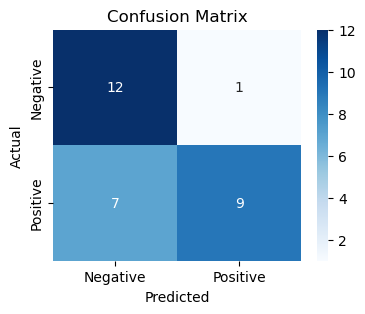

In [ ]:
# Evaluate the model on the testing data 
y_pred = pipeline_train.predict(X_test)  # Predict the labels for the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print("Accuracy of the model on the testing data:", accuracy)  # Output the accuracy of the model
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))  # Output the classification report
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Calculate the confusion matrix
print("Confusion Matrix:\n", conf_matrix)  # Output the confusion matrix    
# Plot the confusion matrix
plt.figure(figsize=(4, 3))  # Set the figure size for the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])  # Create a heatmap for the confusion matrix
plt.title('Confusion Matrix')  # Set the title of the plot
plt.xlabel('Predicted')  # Set the x-axis label
plt.ylabel('Actual')  # Set the y-axis label
plt.show()  # Display the plot

The logistic regression model, trained on the selected TF-IDF features, achieved an accuracy of approximately 72% on the test set. According to [cloudfactory], we should consider accuracy > 0.7 as a good one.

We can use the confusion matrix, which provides a comprehensive overview of how well the model’s predictions align with the actual outcomes, to calculate other metrics such as accuracy, precision, recall, and F1 score.

|                        | Predicted Positive | Predicted Negative |
|------------------------|--------------------|--------------------|
| **Actual Positive**    | 9 (TP) | 7 (FN)|
| **Actual Negative**    | 1 (FP)| 12 (TN)|

- **TP (True Positive):** Model correctly predicts positive sentiment.
- **TN (True Negative):** Model correctly predicts negative sentiment.
- **FP (False Positive):** Model incorrectly predicts positive when it's negative (Type I error).
- **FN (False Negative):** Model incorrectly predicts negative when it's positive (Type II error).

    
The confusion matrix reveals that the model correctly identified 9 positive reviews and  12 negative reviews, with only a few misclassifications, 1 false positive and 7 false negatives. This indicates that the model performs slightly better at detecting negative reviews than positive ones.

We can use this matrix to calculate:

- **Accuracy** = (TP + TN) / (TP + TN + FP + FN) = (9 + 12) / (9 + 12 + 1 + 7) = 0.724  

- **Precision** = TP / (TP + FP) = 9 / (9 + 1) = 0.90   (label 1) # measures the accuracy of the positive predictions made by the model.

- **Recall** = TP / (TP + FN) = 9 / (9 + 7) = 0.562  (label 1)  # measures the model’s ability to correctly identify all the actual positive cases in the dataset. It tells us how many of the real positive instances the model was able to find positive.

- **F1 Score** = 2 × (Precision × Recall) / (Precision + Recall)  
               = 2 × (0.90 × 0.562) / (0.90 + 0.562)  
               = 0.692 (label 1) #  the harmonic mean of precision and recall. It provides a balanced measure that considers both how many predictions were correct and how many actual positives were found.


The precision for positive reviews is quite high at 0.90, meaning that when the model predicts a review as positive, it’s correct 90% of the time. However, the recall is lower at 0.56, which shows that the model misses several actual positive reviews. The F1-score of 0.69 for positive reviews reflects a balance between precision and recall.

[cloudfactory]: https://wiki.cloudfactory.com/docs/mp-wiki/metrics/accuracy#:~:text=If%20you%20are%20getting%20more,make%20a%20single%20correct%20prediction

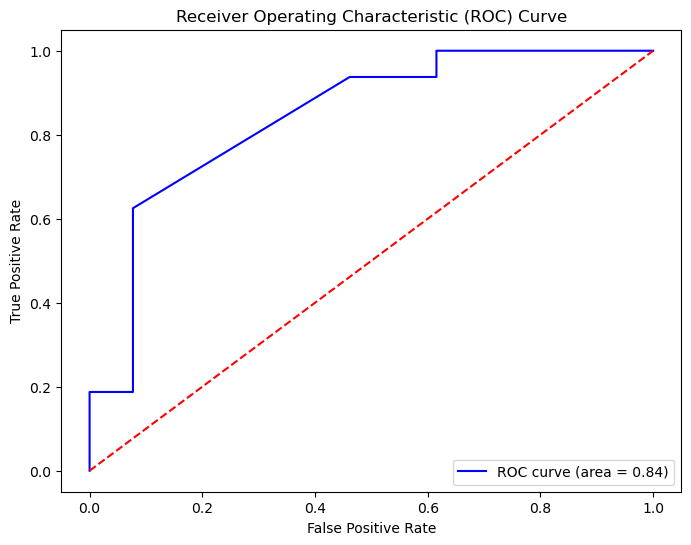

In [48]:
# display the roc curve and calculate the AUC score
# Get the predicted probabilities for the positive class
y_prob = pipeline_train.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
# Calculate the AUC score
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve
# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))  # Plot the ROC curve with AUC score
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Plot the diagonal line representing random guessing
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set the title of the plot
plt.xlabel('False Positive Rate')  # Set the x-axis label
plt.ylabel('True Positive Rate')  # Set the y-axis label
plt.legend(loc='lower right')  # Add a legend to the plot
plt.show()  # Display the plot  


The Receiver Operating Characteristic (ROC) curve is a graphical representation of a model’s diagnostic performance ([Evidently,2025]). It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds ([Recforge]). This visualizes the model’s ability to distinguish between two classes ([Evidently,2025]). 

From the figure above , the curve is positioned near the top-left corner of the graph, indicating that the model performs well at distinguishing between positive and negative reviews. The area under the curve (AUC) is 0.84, which reflects a strong ability to differentiate between the two classes. This high AUC value confirms the model’s effectiveness in correctly identifying sentiment in the text data.

[Evidently,2025]: https://www.evidentlyai.com/classification-metrics/explain-roc-curve
[Recforge]: https://academy.recforge.com/#/course/sentiment-analysis-216

Given the small size of the dataset, the model performs well. It is able to effectively capture and distinguish between positive and negative sentiments in patient reviews. However, there are some limitations with the use of TF-IDF, as it does not consider the context in which words appear. By using more advanced techniques, such as BERT, which use transformer-based machine learning techniques to capture semantic meaning and context, we could potentially improve the model’s performance. Additionally, increasing the dataset size would likely enhance the model’s ability to generalize and deliver more accurate results.

In [49]:
df_cleaned.head(5)

,reviews,labels,review_length
0,explained initially take sitings total treatment cost rupee total treatment charged rupee including medicinesthe estimation treatment false,0,206
1,great definitely recommend recommends less medicine explain everything provide solution,1,102
2,doctor came spent second recommended nose throat endoscopy hearing test night hearing test doctor avilable make sense charge endoscopy doctor going perform request hospital humanity ground spend t...,0,651
3,completely satisfied consultation acute severe bronchitis acute laringitis last day aware consulted doctor different hospital earlier wasnt advised test xray doctor didnt gave proper treatment con...,1,637
4,experience nice dyed cool compose patiently listened medication history gave simple treatment hopefully post course day recommend people medication,1,211


## Predict sentiment 

In [51]:
# Enter a new review and predict its sentiment
new_review = input("Please enter a new review: ")  # Ask the user to input a new review
# Preprocess the new review
new_review_processed = preprocess_reviews(new_review)  # Preprocess the new review using the defined function
# Convert the preprocessed review back to a string
new_review_processed = join_words(new_review_processed)  # Join the list of words back into a single string
# Predict the sentiment of the new review
predicted_sentiment_input = pipeline_train.predict([new_review_processed])  # Predict the sentiment using the trained pipeline
# Output the predicted sentiment
print("Predicted sentiment for the new review:", "Positive" if predicted_sentiment_input[0] == 1 else "Negative")  # Output the predicted sentiment as 'Positive' or 'Negative' 


Predicted sentiment for the new review: Negative


# References 

Ashmed. 2024. *_ML Series 9: Understanding Logistic Regression: A Practical Guide_* [Online]. Available at: https://medium.com/@sahin.samia understanding-logistic-regression-a-practical-guide-7aa94ca62c80 (Accessed: 25 June 2025).

Bassey. 2019. *_Logistic Regression in Machine Learning_* [Online]. Available at: https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/ (Accessed: 25 June 2025).

CrawlSpider. 2024. *_Can TF-IDF be used for text Classification, How?_* [Online]. Available at: https://www.crawlspider.com/can-tf-idf-be-used-for-text-classification-how/ (Accessed: 25 June 2025).

Evidently. 2025 *_How to explain the ROC curve and ROC AUC score?_* [Online]. Available at: https://www.evidentlyai.com/classification-metrics/explain-roc-curve (Accessed: 25 June 2025).

GeeksforGeeks. 2025. *_Logistic Regression in Machine Learning_* [Online]. Available at: https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/ (Accessed: 25 June 2025).

Gillis. 2024. *_What is sentiment analysis_* [Online]. Available at: https://www.techtarget.com/searchbusinessanalytics/definition/opinion-mining-sentiment-mining
 (Accessed: 26 June 2025).

Indeed Team. 2025. *_When to Use Logistic Regression (With Definition and Types)_* [Online]. Available at: https://ca.indeed.com/career-advice/career-development/when-to-use-logistic-regression#:~:text=Logistic%20regression%20is%20a%20popular,data%20to%20produce%20accurate%20results.
 (Accessed: 26 June 2025).

Kanade. 2022. *_What Is Logistic Regression? Equation, Assumptions, Types, and Best Practices_* [Online]. Available at: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/
 (Accessed: 26 June 2025).

Kavya. 2023. *_Naive Bayes Classifier Explained: Assumptions, Types, and Uses_* [Online]. Available at: https://medium.com/@kavyasrirelangi100/naive-bayes-classifier-explained-assumptions-types-and-uses-bef767a758a3 (Accessed: 27 June 2025).

Parr. 2024. *_Sentiment Analysis in Healthcare: Transforming Patient Feedback into Actionable Insights_* [Online]. Available at: https://www.repugen.com/blog/sentiment-analysis-in-healthcare
 (Accessed: 27 June 2025).

Recforge. 2025 *_Sentiment analysis_* [Online]. Available at: https://academy.recforge.com/#/course/sentiment-analysis-216 (Accessed: 27 June 2025).


Simha. 2021. *_Understanding TF-IDF for Machine Learning_* [Online]. Available at: https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/ (Accessed: 27 June 2025).

Turning. 2022. *_How to Create Naive Bayes Document Classification in Python?_* [Online]. Available at: https://www.turing.com/kb/document-classification-using-naive-bayes (Accessed: 27 June 2025).













